In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"C:\Users\Skill-Lync\Downloads\auto.csv")


In [3]:
pd.set_option("display.max_columns",100)
data.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


## DATA PREPROCCESSING 

### CHANGING THE COLUMNS NAME OF DATA W.R.T CLEAN DATA

In [4]:
data.rename({"gas":"Gas","3":"symboling","?":"normalized_losses","alfa-romero":"make","std":"aspiration",
              "two":"num_of_doors","convertible":"body_style","rwd":"drive_wheels",
              "front":"engine_location","88.6":"wheel_base","168.8":"length","64.1":"width",
               "48.8":"height"},axis=1,inplace=True)

In [5]:
data.rename({"2548":"curb_weight","dohc":"engine_type","four":"num_of_cylinders",
             "130":"engine size","mpfi":"fuel_system","3.47":"bore","2.68":"stroke",
             "9.0":"compression_ration","111":"horsepower","5000":"peak_rpm","21":"city_mpg",
              "27":"highway_mpg","13495":"price"},axis=1,inplace=True)

In [6]:
data.head()

,symboling,normalized_losses,make,Gas,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine size,fuel_system,bore,stroke,compression_ration,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [7]:
data.isnull().sum()

symboling             0
normalized_losses     0
make                  0
Gas                   0
aspiration            0
num_of_doors          0
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine size           0
fuel_system           0
bore                  0
stroke                0
compression_ration    0
horsepower            0
peak_rpm              0
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

### IMPUTING CORRUPTED DATA

In [8]:
data.loc[data["normalized_losses"]=="?","normalized_losses"]= 0
data.loc[data["price"]=="?","price"]= 0

<AxesSubplot:xlabel='normalized_losses', ylabel='Density'>

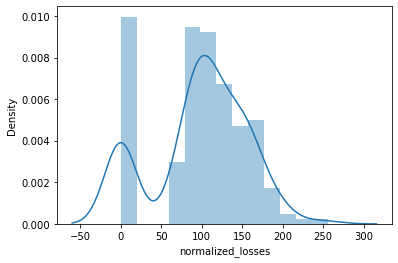

In [9]:
sns.distplot(data.normalized_losses)

<AxesSubplot:xlabel='price', ylabel='Density'>

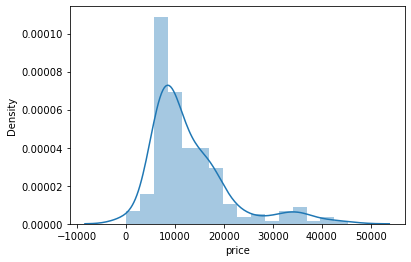

In [10]:
sns.distplot(data.price)

* It can be seen that the data of these columns have skewness.
* So we have to impute the corrupt data with median.

In [11]:
data.normalized_losses = data.normalized_losses.astype("int")
data.price = data.price.astype("int")

### IMPUTING CORRUPTED DATA WITH MEDIAN

In [12]:
data.loc[data["normalized_losses"]==0,"normalized_losses"]=data.normalized_losses.median()
data.loc[data["price"]==0,"price"]=data.price.median()

In [13]:
data.head()

,symboling,normalized_losses,make,Gas,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine size,fuel_system,bore,stroke,compression_ration,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,103,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
1,1,103,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
4,2,103,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0


In [14]:
print(data.make.value_counts())
print("___________________________")
print(data.aspiration.value_counts())
print("___________________________")
print(data.num_of_doors.value_counts())

print("___________________________")
print(data.body_style.value_counts())

print("___________________________")
print(data.engine_location.value_counts())

print("___________________________")
print(data.engine_type.value_counts())


print("___________________________")
print(data.num_of_cylinders.value_counts())

print("___________________________")
print(data.fuel_system.value_counts())





toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
renault           2
alfa-romero       2
mercury           1
Name: make, dtype: int64
___________________________
std      167
turbo     37
Name: aspiration, dtype: int64
___________________________
four    114
two      88
?         2
Name: num_of_doors, dtype: int64
___________________________
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     5
Name: body_style, dtype: int64
___________________________
front    201
rear       3
Name: engine_location, dtype: int64
___________________________
ohc      148
ohcf      15
ohcv      13
l         12
dohc      11
rotor      4
dohcv   

In [15]:
print(data.make.value_counts())
print("___________________________")
print(data.aspiration.value_counts())
print("___________________________")
print(data.num_of_doors.value_counts())

print("___________________________")
print(data.body_style.value_counts())

print("___________________________")
print(data.engine_location.value_counts())

print("___________________________")
print(data.engine_type.value_counts())


print("___________________________")
print(data.num_of_cylinders.value_counts())

print("___________________________")
print(data.fuel_system.value_counts())





toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
renault           2
alfa-romero       2
mercury           1
Name: make, dtype: int64
___________________________
std      167
turbo     37
Name: aspiration, dtype: int64
___________________________
four    114
two      88
?         2
Name: num_of_doors, dtype: int64
___________________________
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     5
Name: body_style, dtype: int64
___________________________
front    201
rear       3
Name: engine_location, dtype: int64
___________________________
ohc      148
ohcf      15
ohcv      13
l         12
dohc      11
rotor      4
dohcv   

### CATAGORICAL DATA HANDLING

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   symboling           204 non-null    int64  
 1   normalized_losses   204 non-null    int32  
 2   make                204 non-null    object 
 3   Gas                 204 non-null    object 
 4   aspiration          204 non-null    object 
 5   num_of_doors        204 non-null    object 
 6   body_style          204 non-null    object 
 7   drive_wheels        204 non-null    object 
 8   engine_location     204 non-null    object 
 9   wheel_base          204 non-null    float64
 10  length              204 non-null    float64
 11  width               204 non-null    float64
 12  height              204 non-null    float64
 13  curb_weight         204 non-null    int64  
 14  engine_type         204 non-null    object 
 15  num_of_cylinders    204 non-null    object 
 16  engine s

### USING LABEL ENCODER TO HANDLE CATAGORICAL DATA

In [17]:
data.loc[data["horsepower"]=="?","horsepower"] = 0
data.loc[data["peak_rpm"] =="?","peak_rpm"] = 0

data.horsepower = data.horsepower.astype("float")
data.peak_rpm = data.peak_rpm.astype("float")

In [18]:
data.loc[data["bore"] =="?","bore"] = 0
data.loc[data["stroke"] =="?","stroke"] = 0



data.bore = data.bore.astype("float")
data.stroke = data.stroke.astype("float")


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   symboling           204 non-null    int64  
 1   normalized_losses   204 non-null    int32  
 2   make                204 non-null    object 
 3   Gas                 204 non-null    object 
 4   aspiration          204 non-null    object 
 5   num_of_doors        204 non-null    object 
 6   body_style          204 non-null    object 
 7   drive_wheels        204 non-null    object 
 8   engine_location     204 non-null    object 
 9   wheel_base          204 non-null    float64
 10  length              204 non-null    float64
 11  width               204 non-null    float64
 12  height              204 non-null    float64
 13  curb_weight         204 non-null    int64  
 14  engine_type         204 non-null    object 
 15  num_of_cylinders    204 non-null    object 
 16  engine s

In [20]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data.make = lb.fit_transform(data.make)
data.aspiration = lb.fit_transform(data.aspiration)
data.num_of_doors = lb.fit_transform(data.num_of_doors)
data.body_style = lb.fit_transform(data.body_style)
data.drive_wheels = lb.fit_transform(data.drive_wheels)
data.engine_location = lb.fit_transform(data.engine_location)
data.engine_type = lb.fit_transform(data.engine_type)
data.num_of_cylinders = lb.fit_transform(data.num_of_cylinders)
data.fuel_system = lb.fit_transform(data.fuel_system)


In [21]:
data.loc[data.num_of_doors==0,"num_of_doors"]=data.num_of_doors.median()

In [22]:
data1 = pd.get_dummies(data.Gas,drop_first=True,prefix_sep="gas")
data = pd.concat([data,data1],axis=1)

In [23]:
data.head()

,symboling,normalized_losses,make,Gas,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine size,fuel_system,bore,stroke,compression_ration,horsepower,peak_rpm,city_mpg,highway_mpg,price,gas
0,3,103,0,gas,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,1
1,1,103,0,gas,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
2,2,164,1,gas,0,1,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,1
3,2,164,1,gas,0,1,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,1
4,2,103,1,gas,0,2,3,1,0,99.8,177.3,66.3,53.1,2507,3,1,136,5,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,1


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   symboling           204 non-null    int64  
 1   normalized_losses   204 non-null    int32  
 2   make                204 non-null    int32  
 3   Gas                 204 non-null    object 
 4   aspiration          204 non-null    int32  
 5   num_of_doors        204 non-null    int32  
 6   body_style          204 non-null    int32  
 7   drive_wheels        204 non-null    int32  
 8   engine_location     204 non-null    int32  
 9   wheel_base          204 non-null    float64
 10  length              204 non-null    float64
 11  width               204 non-null    float64
 12  height              204 non-null    float64
 13  curb_weight         204 non-null    int64  
 14  engine_type         204 non-null    int32  
 15  num_of_cylinders    204 non-null    int32  
 16  engine s

## FEATURE SELECTION

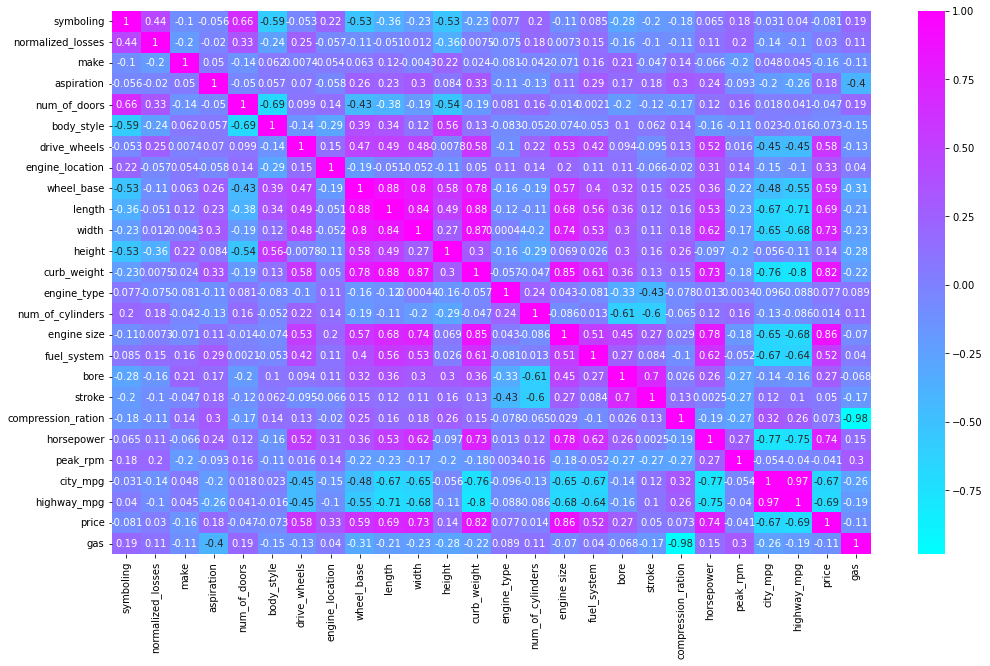

In [25]:
plt.figure(figsize=(17,10))
sns.heatmap(data.corr(),annot=True,cmap="cool")
plt.show()

### DROPING UNIQUE AND HIGHLY CO-RELATED COLUMNS

In [26]:
data.drop(["city_mpg","Gas"],axis=1,inplace=True)

In [27]:
x = data.drop("price",axis=1)
y = data.price
x.rename({'engine size':"engine_size"},axis=1,inplace=True)
x.head()

,symboling,normalized_losses,make,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ration,horsepower,peak_rpm,highway_mpg,gas
0,3,103,0,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,27,1
1,1,103,0,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154.0,5000.0,26,1
2,2,164,1,0,1,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102.0,5500.0,30,1
3,2,164,1,0,1,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115.0,5500.0,22,1
4,2,103,1,0,2,3,1,0,99.8,177.3,66.3,53.1,2507,3,1,136,5,3.19,3.40,8.5,110.0,5500.0,25,1


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler

In [29]:
st = StandardScaler()
x = st.fit_transform(x)

In [30]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25)

### LINEAR REGRESSION

In [31]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

In [32]:
print(r2_score(lr_pred,y_test))
print(mean_absolute_error(lr_pred,y_test))

0.8031146864082361
2542.26957250105


### DECISION TREE

In [33]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)

In [34]:
print(r2_score(dt_pred,y_test))
print(mean_absolute_error(dt_pred,y_test))

0.7371077836052493
2317.921568627451


### RANDOM FOREST

In [35]:
from sklearn.model_selection import RandomizedSearchCV
parameters = { "n_estimators": [int(i) for i in np.linspace(1,500,10)],
              "max_depth" : [int(i) for i in np.linspace(10,500,10)],
               "max_features" : ["auto","sqrt"],
               "min_samples_split":[1,5,10,15,20],
               "min_samples_leaf" : [1,2,4,6,8],
               "bootstrap" : [True,False]}
rf = RandomForestRegressor()
randm = RandomizedSearchCV( estimator = rf , param_distributions = parameters,
                               cv = 2, n_iter = 10, n_jobs=-1)
randm.fit(x_train, y_train)

print(" Results from Random Search " )
print(" The best estimator across ALL searched params:", randm.best_estimator_)
print("The best score across ALL searched params:", randm.best_score_)
print("The best parameters across ALL searched params:", randm.best_params_)

 Results from Random Search 
 The best estimator across ALL searched params: RandomForestRegressor(bootstrap=False, max_depth=445, max_features='sqrt',
                      min_samples_split=5, n_estimators=333)
The best score across ALL searched params: 0.8471089619285921
The best parameters across ALL searched params: {'n_estimators': 333, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 445, 'bootstrap': False}


In [36]:
rfr = RandomForestRegressor(n_estimators=333,min_samples_split=10,min_samples_leaf=1,
                            max_features="sqrt",max_depth=64,bootstrap=False)

In [37]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=64, max_features='sqrt',
                      min_samples_split=10, n_estimators=333)

In [38]:
rfr_pred = rfr.predict(x_test)

In [39]:
print(r2_score(rfr_pred,y_test))
print(mean_absolute_error(rfr_pred,y_test))

0.7544010557885058
1998.6728497989109


### CONCLUSION 

In [40]:
print("r2 of lr : ",r2_score(lr_pred,y_test))
print("r2 of dt : ",r2_score(dt_pred,y_test))
print("r2 of rfr : ",r2_score(rfr_pred,y_test))

r2 of lr :  0.8031146864082361
r2 of dt :  0.7371077836052493
r2 of rfr :  0.7544010557885058


* Comparitevly , Linear regression is working good on this data set.


In [41]:
import pickle

In [45]:
file = open("car_price.pkl","wb")

In [46]:
pickle.dump(rfr,file)

In [47]:
nn = open("car_price.pkl","rb")
model = pickle.load(nn)